In [2]:
from tensorflow.keras import optimizers,datasets,layers
import tensorflow as tf


In [3]:
(train_x,train_y),(test_x,test_y)=datasets.mnist.load_data()


In [4]:
train_x.shape

(60000, 28, 28)

In [5]:
train_x=train_x.reshape(60000,28,28,1)
test_x=test_x.reshape(10000,28,28,1)

In [6]:
train_x.shape

(60000, 28, 28, 1)

In [7]:
print(train_x[0])

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]


In [8]:
train_x=train_x.astype('float32')/255
test_x=test_x.astype('float32')/255

print(train_x[0])
print(train_y[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

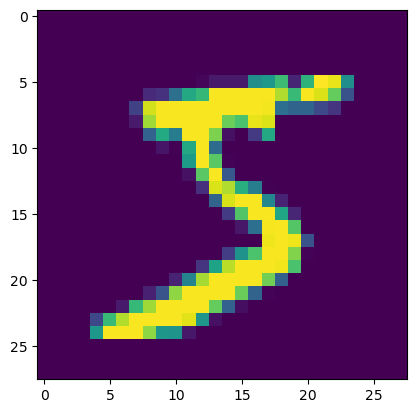

In [9]:
import matplotlib.pyplot as plt
plt.imshow(train_x[0])


In [10]:
train_y=tf.keras.utils.to_categorical(train_y)
test_y=tf.keras.utils.to_categorical(test_y)

In [11]:
train_y[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [12]:
train_x.shape

(60000, 28, 28, 1)

In [13]:
from tensorflow.keras import activations,Sequential


In [14]:
model=Sequential()

In [15]:
model.add(layers.Conv2D(filters= 32,kernel_size=5,strides=1,padding='same',activation=tf.nn.relu,input_shape=(28,28,1)))

d:\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'))

In [17]:
model.add(layers.Conv2D(filters= 64,kernel_size=3,strides=(1,1),padding='same',activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='valid'))
model.add(layers.Flatten())
model.add(layers.Dense(units=128,activation=tf.nn.relu))
model.add(layers.Dense(units=10,activation=tf.nn.softmax))

In [18]:
train_x=train_x.reshape(60000,28,28,1)
test_x=test_x.reshape(10000,28,28,1)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
hist=model.fit(x=train_x,y=train_y,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.8462 - loss: 0.5472 - val_accuracy: 0.9772 - val_loss: 0.0768
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9792 - loss: 0.0698 - val_accuracy: 0.9812 - val_loss: 0.0621
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9863 - loss: 0.0435 - val_accuracy: 0.9862 - val_loss: 0.0453
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9895 - loss: 0.0323 - val_accuracy: 0.9864 - val_loss: 0.0451
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9924 - loss: 0.0250 - val_accuracy: 0.9873 - val_loss: 0.0419
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9940 - loss: 0.0190 - val_accuracy: 0.9858 - val_loss: 0.0522
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9948 - loss: 0.0173 - val_accuracy: 0.9894 - val_loss: 0.0391
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9962 - loss: 0.0128 - 

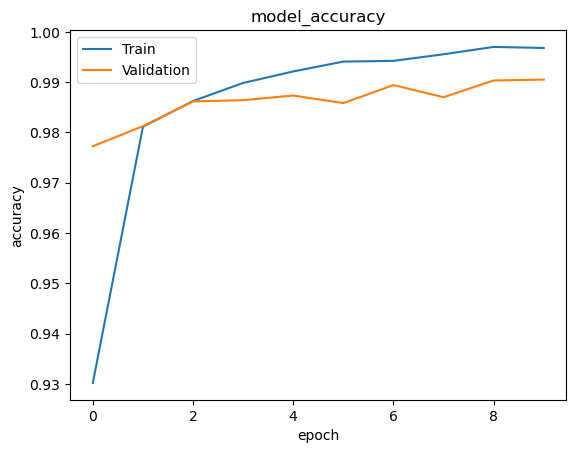

In [21]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()


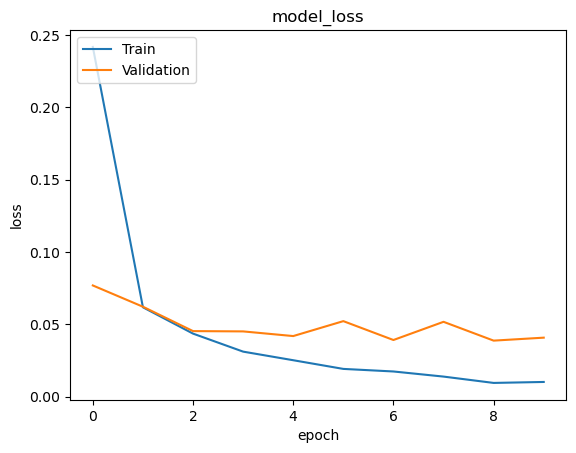

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()
